<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/Week9/Week9_Keras_Complex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# BASIC WALK THROUGH FOR SIMPLE MNIST NN
# BASED ON TENSORFLOW TUTORIALS (2020)

from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

import matplotlib.pyplot as plt
import time

In [2]:
# SET HYPER-PARAMETERS

num_classes = 10
input_shape = (28, 28, 1)

In [3]:
# OBTAIN - THERE ARE MANY WAYS TO OBTAIN MNIST - THIS IS ONE

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


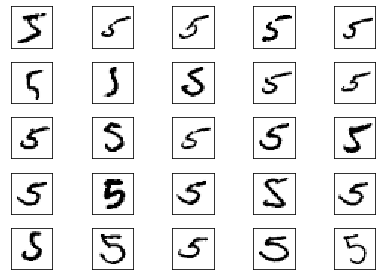

In [4]:
# EXPLORE - VISUALIZE DIFFERENT VARIATIONS OF 5

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = x_train[y_train == 5][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()


In [5]:
# SCRUB - THERE ARE MANY WAYS TO SHAPE THE DATE
# IN THIS CASE WE REALLY WANT 28 x 28
# AND WE WANT INTENSITY FROM 0-1

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# SCRUB - THERE ARE MANY WAY TO ENCODE THE LABEL
# THIS IS ONE

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [7]:
# MODEL - BUILD THE COMPLEX

def complex_model():
    model = keras.Sequential()
    model.add(keras.Input(shape=input_shape))                                   # input layer - in this case the basic 28 x 28
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))         # first convolution layer - creates new feature map - builds up 
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))                            # pooling layer to slim down the number of features
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))                                              # help prevent overfitting  
    model.add(layers.Dense(num_classes, activation="softmax"))
    #COMPILE MODEL
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


In [8]:
# MODEL - FIT THE BASE MODEL

# NEW HYPERPARAMETERS

batch_size = 200
epochs = 5

start = time.time()  # TRACK TIME

model = complex_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# MODEL - RESULTS

score = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK

Epoch 1/5
270/270 [==============================] - 2s 6ms/step - loss: 0.4561 - accuracy: 0.8615 - val_loss: 0.1016 - val_accuracy: 0.9723
Epoch 2/5
270/270 [==============================] - 1s 5ms/step - loss: 0.1387 - accuracy: 0.9577 - val_loss: 0.0712 - val_accuracy: 0.9823
Epoch 3/5
270/270 [==============================] - 1s 5ms/step - loss: 0.1000 - accuracy: 0.9692 - val_loss: 0.0526 - val_accuracy: 0.9865
Epoch 4/5
270/270 [==============================] - 1s 5ms/step - loss: 0.0838 - accuracy: 0.9740 - val_loss: 0.0475 - val_accuracy: 0.9860
Epoch 5/5
270/270 [==============================] - 1s 5ms/step - loss: 0.0709 - accuracy: 0.9774 - val_loss: 0.0399 - val_accuracy: 0.9888
Baseline Error: 1.33%
20.45013689994812


Now that we know the model runs and performs pretty well - lets save the results and look at one of the performance plots

In [9]:
# MODEL - RUN THE MODEL AND SAVE THE RESULTS

model = complex_model()
# ADJUST HYPERPARAMETERS

batch_size = 1000
epochs = 100

# FIT THE MODEL
# STORE THE MODEL RESULTS IN history TO USE FOR BUILDING ROC PLOT

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# EVALUATE THE MODEL
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/100
54/54 [==============================] - 1s 19ms/step - loss: 1.0811 - accuracy: 0.6929 - val_loss: 0.2282 - val_accuracy: 0.9363
Epoch 2/100
54/54 [==============================] - 1s 17ms/step - loss: 0.2667 - accuracy: 0.9201 - val_loss: 0.1282 - val_accuracy: 0.9662
Epoch 3/100
54/54 [==============================] - 1s 17ms/step - loss: 0.1763 - accuracy: 0.9476 - val_loss: 0.0972 - val_accuracy: 0.9750
Epoch 4/100
54/54 [==============================] - 1s 17ms/step - loss: 0.1403 - accuracy: 0.9571 - val_loss: 0.0808 - val_accuracy: 0.9790
Epoch 5/100
54/54 [==============================] - 1s 17ms/step - loss: 0.1206 - accuracy: 0.9636 - val_loss: 0.0689 - val_accuracy: 0.9815
Epoch 6/100
54/54 [==============================] - 1s 17ms/step - loss: 0.1041 - accuracy: 0.9681 - val_loss: 0.0640 - val_accuracy: 0.9827
Epoch 7/100
54/54 [==============================] - 1s 17ms/step - loss: 0.0949 - accuracy: 0.9709 - val_loss: 0.0596 - val_accuracy: 0.9840
Epoch 

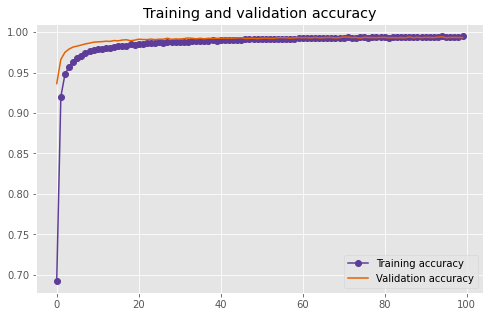

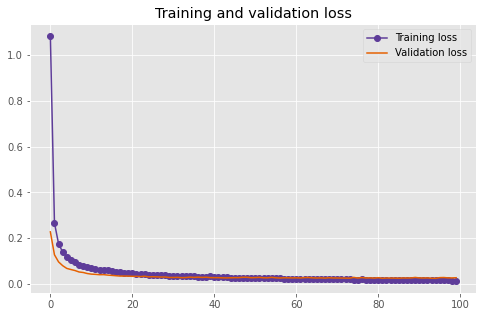

In [10]:
# INTERPRET 
# BUILD FUNCTION FOR PLOTTING THE RESULTS OF THE MODEL

def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)

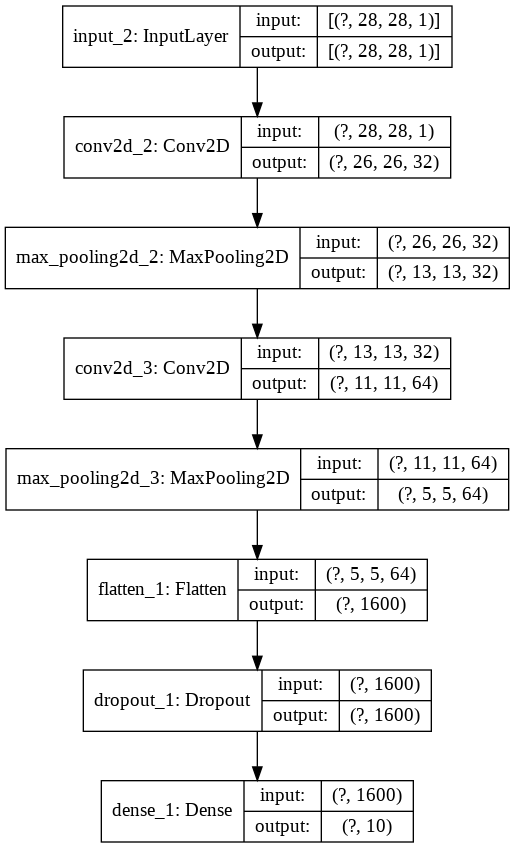

In [15]:
# MODEL - TWO WAYS TO VISUALIZE

keras.utils.plot_model(model, show_shapes=True)
# print(model.summary())